# 1. Value Iteration
### 1.0 Value Iteration on a Grid World environment 


The Returned Value V: 
[[42.60419485 48.45004585 54.94543585 62.16253585 70.18153585]
 [48.45004585  0.         62.16253585 70.18153585 79.09153585]
 [54.94543585 62.16253585  0.         79.09153585 88.99153585]
 [62.16253585 70.18153585 79.09153585  0.         99.99153585]
 [70.18153585 79.09153585 88.99153585 99.99153585 99.99153585]]

The Returned Value of policy
0: ^,   Up 
1: v,   Down 
2: <,   Left 
3: >    Right 
[[1 3 1 1 1]
 [1 0 3 1 1]
 [1 1 0 3 1]
 [1 1 1 0 1]
 [3 3 3 3 1]]

Log of Value Changes:
[10.0, 9.0, 8.100000000000001, 7.290000000000002, 6.561000000000002, 5.904900000000001, 5.314410000000002, 4.782969000000001, 4.304672100000002, 3.8742048900000023, 3.4867844010000013, 3.138105960900006, 2.8242953648100055, 2.5418658283290085, 2.2876792454961077, 2.0589113209464998, 1.8530201888518505, 1.667718169966662, 1.5009463529700042, 1.3508517176730024, 1.2157665459057014, 1.094189891315132, 0.9847709021836195, 0.8862938119652597, 0.7976644307687337, 0.7178979876918632, 0.64

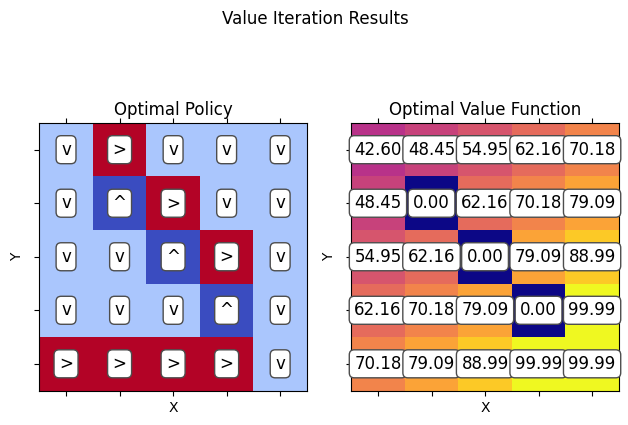

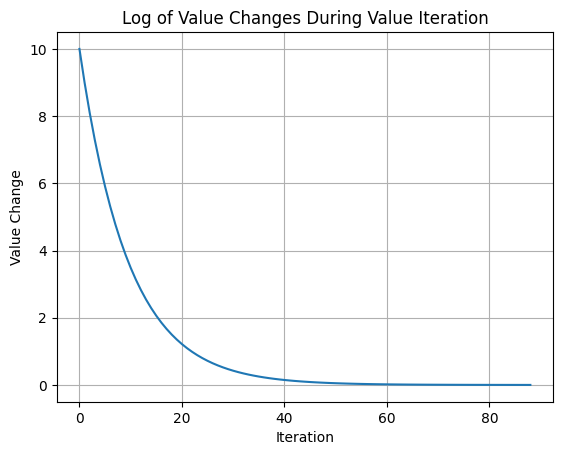

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class GridEnvironment:
    def __init__(self, width=5, height=5, start=(0, 0), goal=(4, 4), obstacles=None, step_reward=-1.0, goal_reward=10.0, obstacle_penalty=-10.0):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.step_reward = step_reward
        self.goal_reward = goal_reward
        self.obstacle_penalty = obstacle_penalty

        # Initialize grid with empty cells
        self.grid = np.zeros((height, width))
        
        # Place goal
        self.grid[goal] = 2

        # Place obstacles
        self.obstacles = obstacles if obstacles is not None else []
        for obs in self.obstacles:
            self.grid[obs] = 1

        self.actions = {
            "up": (-1, 0),
            "down": (1, 0),
            "left": (0, -1),
            "right": (0, 1)
        }

    def is_valid_state(self, state):
        x, y = state
        return 0 <= x < self.height and 0 <= y < self.width and self.grid[x, y] != 1

    def get_next_state(self, state, action):
        x, y = state
        dx, dy = self.actions[action]
        next_state = (x + dx, y + dy)
        if self.is_valid_state(next_state):
            return next_state
        return state

    def get_reward(self, state, next_state):
        if next_state == self.goal:
            return self.goal_reward
        elif self.grid[next_state] == 1:
            return self.obstacle_penalty
        else:
            return self.step_reward


def value_iteration(env, gamma=0.9, epsilon=0.001, max_iterations=100):
    V = np.zeros((env.height, env.width))
    policy = np.zeros((env.height, env.width), dtype=int)
    log = []

    for _ in range(max_iterations):
        delta = 0
        for i in range(env.height):
            for j in range(env.width):
                state = (i, j)
                if not env.is_valid_state(state):
                    continue
                v_old = V[i, j]
                values = []
                for action_idx, (action, (dx, dy)) in enumerate(env.actions.items()):
                    next_state = env.get_next_state(state, action)
                    reward = env.get_reward(state, next_state)
                    value = reward + gamma * V[next_state[0], next_state[1]]
                    values.append(value)
                V[i, j] = np.max(values)
                policy[i, j] = np.argmax(values)
                delta = max(delta, abs(v_old - V[i, j]))
        log.append(delta)
        if delta < epsilon:
            break

    return V, policy, log


def main():
    width, height = 5, 5
    start = (0, 0)
    goal = (4, 4)
    obstacles = [(1, 1), (2, 2), (3, 3)]
    env = GridEnvironment(width, height, start, goal, obstacles)

    gamma = 0.9
    epsilon = 0.001

    V, policy, log = value_iteration(env, gamma, epsilon)

    print("\nThe Returned Value V: ")
    print(V)

    print("\nThe Returned Value of policy\n0: ^,   Up \n1: v,   Down \n2: <,   Left \n3: >    Right ")
    print(policy)

    print("\nLog of Value Changes:")
    print(log)

    arrows = {
        0: "^",  # Up
        1: "v",  # Down
        2: "<",  # Left
        3: ">"   # Right
    }

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle("Value Iteration Results")

    ax1.set_title("Optimal Policy")
    ax1.matshow(policy, cmap="coolwarm")
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            action = policy[i, j]
            ax1.text(j, i, arrows[action], ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax1.set_xticks(range(policy.shape[1]))
    ax1.set_yticks(range(policy.shape[0]))
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    ax2.set_title("Optimal Value Function")
    ax2.matshow(V, cmap="plasma")
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            value = V[i, j]
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax2.set_xticks(range(V.shape[1]))
    ax2.set_yticks(range(V.shape[0]))
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    plt.tight_layout()
    plt.show()

    iterations = range(len(log))
    plt.plot(iterations, log)
    plt.xlabel("Iteration")
    plt.ylabel("Value Change")
    plt.title("Log of Value Changes During Value Iteration")
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()


### 1.2. Value Iteration on FrozenLake-v1 environment

C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


Optimal Value Function:
[[0.95099005 0.96059601 0.970299   0.96059601]
 [0.96059601 0.         0.9801     0.        ]
 [0.970299   0.9801     0.99       0.        ]
 [0.         0.99       1.         0.        ]]

Optimal Policy:
[['v' '>' 'v' '<']
 ['v' '<' 'v' '<']
 ['>' 'v' 'v' '<']
 ['<' '>' '>' '<']]

 LOG:
 
[1.0, 0.99, 0.9801, 0.9702989999999999, 0.96059601, 0.9509900498999999, 0]


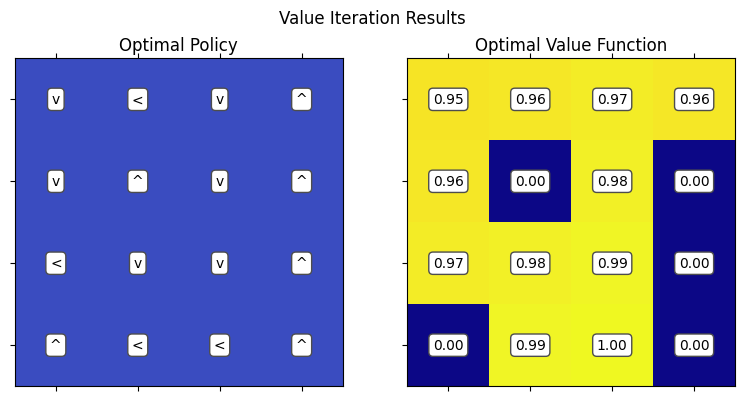

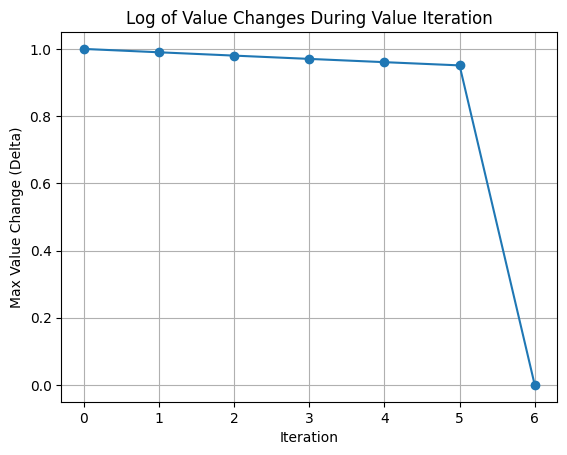


Rendering policy in the environment:
Goal state reached!


In [6]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import time

def value_iteration(env, gamma=0.99, epsilon=1e-6):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    V = np.zeros(n_states)
    policy = np.zeros(n_states, dtype=int)
    log = []

    while True:
        delta = 0
        for s in range(n_states):
            v = V[s]
            q_values = np.zeros(n_actions)
            for a in range(n_actions):
                for prob, next_state, reward, done in env.P[s][a]:
                    q_values[a] += prob * (reward + gamma * V[next_state] * (not done))
            V[s] = np.max(q_values)
            policy[s] = np.argmax(q_values)
            delta = max(delta, abs(v - V[s]))
        log.append(delta)
        if delta < epsilon:
            break

    return V, policy, log

def print_policy(policy, shape):
    actions = ['<', 'v', '>', '^']
    policy_grid = np.array([actions[action] for action in policy]).reshape(shape)
    print("\nOptimal Policy:")
    print(policy_grid)

def visualize_results(V, policy, shape, log):
    actions = ['^', 'v', '<', '>']
    policy_grid = np.array([actions[action] for action in policy]).reshape(shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # Adjusted figsize for smaller plot
    fig.suptitle("Value Iteration Results")

    # Plot optimal policy
    ax1.set_title("Optimal Policy")
    ax1.matshow(np.zeros(shape), cmap="coolwarm")
    for i in range(shape[0]):
        for j in range(shape[1]):
            action = policy_grid[i, j]
            ax1.text(j, i, action, ha="center", va="center", fontsize=10,  # Adjusted fontsize
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax1.set_xticks(range(shape[1]))
    ax1.set_yticks(range(shape[0]))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    # Plot optimal value function
    ax2.set_title("Optimal Value Function")
    ax2.matshow(V.reshape(shape), cmap="plasma")
    for i in range(shape[0]):
        for j in range(shape[1]):
            value = V[i * shape[1] + j]
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=10,  # Adjusted fontsize
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax2.set_xticks(range(shape[1]))
    ax2.set_yticks(range(shape[0]))
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    plt.tight_layout()
    plt.show()

    # Plot log of value changes
    iterations = range(len(log))
    plt.plot(iterations, log, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Max Value Change (Delta)")
    plt.title("Log of Value Changes During Value Iteration")
    plt.grid(True)
    plt.show()

def render_policy(env, policy):
    state, _ = env.reset()
    env.render()
    time.sleep(1)  # Pause to display initial state
    for _ in range(20):
        action = policy[state]
        state, reward, done, _, _ = env.step(action)
        env.render()
        time.sleep(1)  # Pause to observe each step
        if done:
            print("Goal state reached!")
            break

def main():
    env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="human")
    gamma = 0.99
    epsilon = 1e-6

    V, policy, log = value_iteration(env, gamma, epsilon)

    print("Optimal Value Function:")
    print(V.reshape((4, 4)))

    print_policy(policy, (4, 4))
    print("\n LOG:\n ")
    print(log)

    visualize_results(V, policy, (4, 4), log)

    
    print("\nRendering policy in the environment:")
    render_policy(env, policy)

if __name__ == "__main__":
    main()


# 2. Policy Itration Implementation
### 2.1 Policy Itration Implementation on Grid World

In [39]:
import numpy as np
import gym

def policy_evaluation(env, policy, gamma=0.99, theta=1e-6):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    V = np.zeros(n_states)

    while True:
        delta = 0
        for s in range(n_states):
            v = V[s]
            action = policy[s]
            state_value = 0
            for prob, next_state, reward, done in env.P[s][action]:
                state_value += prob * (reward + gamma * V[next_state] * (not done))
            V[s] = state_value
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break

    return V

def policy_improvement(env, V, gamma=0.99):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    policy = np.zeros(n_states, dtype=int)

    for s in range(n_states):
        action_values = np.zeros(n_actions)
        for a in range(n_actions):
            for prob, next_state, reward, done in env.P[s][a]:
                action_values[a] += prob * (reward + gamma * V[next_state] * (not done))
        policy[s] = np.argmax(action_values)

    return policy

def policy_iteration(env, gamma=0.99, theta=1e-6):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    policy = np.random.choice(n_actions, size=n_states)  # Random initial policy
    policy_stable = False

    while not policy_stable:
        V = policy_evaluation(env, policy, gamma, theta)
        new_policy = policy_improvement(env, V, gamma)
        policy_stable = np.array_equal(policy, new_policy)
        policy = new_policy

    return policy, V

def main():
    env = gym.make('FrozenLake-v1', is_slippery=False)
    optimal_policy, optimal_value = policy_iteration(env)
    
    print("Optimal Policy:")
    print(optimal_policy.reshape((4, 4)))
    
    print("\nOptimal Value Function:")
    print(optimal_value.reshape((4, 4)))

if __name__ == "__main__":
    main()


Optimal Policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]

Optimal Value Function:
[[0.95099005 0.96059601 0.970299   0.96059601]
 [0.96059601 0.         0.9801     0.        ]
 [0.970299   0.9801     0.99       0.        ]
 [0.         0.99       1.         0.        ]]


### 2.2 Policy Itration Implementation on FrozenLake-v1 environment

C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


Optimal Value Function:
[[0.95099005 0.96059601 0.970299   0.96059601]
 [0.96059601 0.         0.9801     0.        ]
 [0.970299   0.9801     0.99       0.        ]
 [0.         0.99       1.         0.        ]]

Optimal Policy:
[['v' '>' 'v' '<']
 ['v' '<' 'v' '<']
 ['>' 'v' 'v' '<']
 ['<' '>' '>' '<']]

 LOG:
 
[1.0, 0.99, 0.9801, 0.9702989999999999, 0.96059601, 0.9509900498999999, 0]


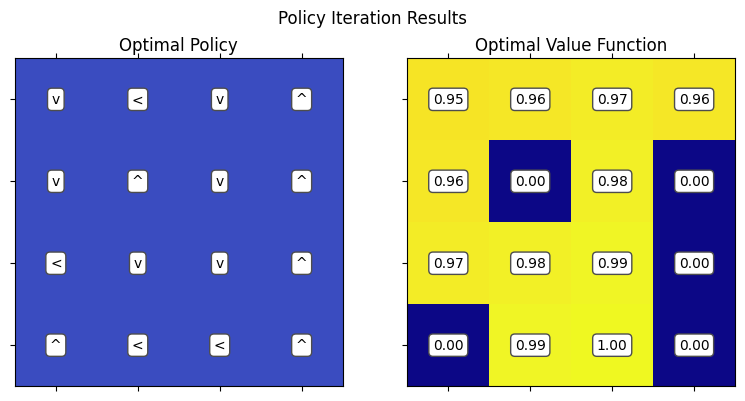

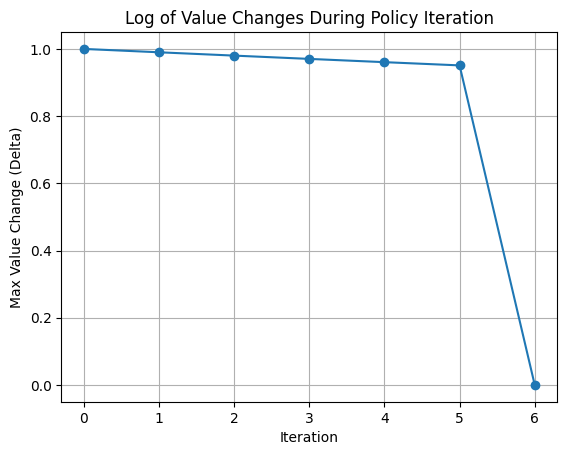


Rendering policy in the environment:
Goal state reached!


In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import time

def policy_iteration(env, gamma=0.99, epsilon=0.01, max_iterations=100):
  """
  Performs policy iteration for the FrozenLake-v1 environment.

  Args:
      env: The gym environment.
      gamma: Discount factor.
      epsilon: Convergence threshold.
      max_iterations: Maximum number of iterations.

  Returns:
      A tuple containing the value function (V), policy (pi), and log of value changes.
  """
  n_states = env.observation_space.n
  n_actions = env.action_space.n
  V = np.zeros(n_states)
  policy = np.zeros(n_states, dtype=int)
  log = []

  for _ in range(max_iterations):

    # Policy Evaluation (similar to value iteration)
    delta = 0
    for s in range(n_states):
      v = V[s]
      q_values = np.zeros(n_actions)
      for a in range(n_actions):
        for prob, next_state, reward, done in env.P[s][a]:
          q_values[a] += prob * (reward + gamma * V[next_state] * (not done))
      V[s] = np.max(q_values)
      delta = max(delta, abs(v - V[s]))
    log.append(delta)

    # Policy Improvement
    policy_stable = True
    for s in range(n_states):
      old_action = policy[s]
      policy[s] = np.argmax(np.array([np.sum([prob * (reward + gamma * V[next_state] * (not done)) for prob, next_state, reward, done in env.P[s][a]]) for a in range(n_actions)]))
      if old_action != policy[s]:
        policy_stable = False

    # Check for convergence
    if delta < epsilon and policy_stable:
      break

  return V, policy, log

def print_policy(policy, shape):
  """
  Prints the policy as arrows on a grid.

  Args:
      policy: A 2D array representing the policy (action for each state).
      shape: A tuple representing the shape of the grid world.
  """
  actions = ['<', 'v', '>', '^']
  policy_grid = np.array([actions[action] for action in policy]).reshape(shape)
  print("\nOptimal Policy:")
  print(policy_grid)

def visualize_results(V, policy, shape, log):
  """
  Visualizes the results of Policy Iteration.

  Args:
      V: A 2D array representing the value function.
      policy: A 2D array representing the policy (action for each state).
      shape: A tuple representing the shape of the grid world.
      log: A list containing the log of value changes during each iteration.
  """
  actions = ['^', 'v', '<', '>']
  policy_grid = np.array([actions[action] for action in policy]).reshape(shape)
  
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
  fig.suptitle("Policy Iteration Results")

  # Plot optimal policy
  ax1.set_title("Optimal Policy")
  ax1.matshow(np.zeros(shape), cmap="coolwarm")
  for i in range(shape[0]):
    for j in range(shape[1]):
      action = policy_grid[i, j]
      ax1.text(j, i, action, ha="center", va="center", fontsize=10,
                bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
  ax1.set_xticks(range(shape[1]))
  ax1.set_yticks(range(shape[0]))
  ax1.set_xticklabels([])
  ax1.set_yticklabels([])

  # Plot optimal value function
  ax2.set_title("Optimal Value Function")
  ax2.matshow(V.reshape(shape), cmap="plasma")
  
  for i in range(shape[0]):
    for j in range(shape[1]):
      value = V[i * shape[1] + j]
      ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=10,
                bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
  ax2.set_xticks(range(shape[1]))
  ax2.set_yticks(range(shape[0]))
  ax2.set_xticklabels([])
  ax2.set_yticklabels([])

  plt.tight_layout()
  plt.show()

  # Plot log of value changes
  iterations = range(len(log))
  plt.plot(iterations, log, marker='o')
  plt.xlabel("Iteration")
  plt.ylabel("Max Value Change (Delta)")
  plt.title("Log of Value Changes During Policy Iteration")
  plt.grid(True)
  plt.show()

def render_policy(env, policy):
  """
  Renders the learned policy in the FrozenLake environment.

  Args:
      env: The gym environment.
      policy: A 2D array representing the policy (action for each state).
  """
  state, _ = env.reset()
  env.render()
  time.sleep(1)  # Pause to display initial state
  for _ in range(20):
    action = policy[state]
    state, reward, done, _, _ = env.step(action)
    env.render()
    time.sleep(1)  # Pause to observe each step
    if done:
      print("Goal state reached!")
      break

def main():
  """
  Main function to run Policy Iteration on FrozenLake-v1 environment.
  """
  env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="human")
  gamma = 0.99
  epsilon = 1e-6

  V, policy, log = policy_iteration(env, gamma, epsilon)

  print("Optimal Value Function:")
  print(V.reshape((4, 4)))

  print_policy(policy, (4, 4))
  print("\n LOG:\n ")
  print(log)

  visualize_results(V, policy, (4, 4), log)

  print("\nRendering policy in the environment:")
  render_policy(env, policy)

if __name__ == "__main__":
  main()


# 3. Q-Learning Implementation 
### 3.1. Q-Learning Implementation on a Grid World Envirognment 


The Returned Q-Value Function (Q):
[[[-1.45236507e+00 -4.34062000e-01 -1.50170414e+00 -2.53124072e+00]
  [-2.66579336e+00 -2.64219778e+00 -2.66832970e+00 -1.13194841e+00]
  [-2.04420968e+00 -1.93189947e+00 -2.09775256e+00  4.90454650e-01]
  [-1.31254187e+00  2.31754089e+00 -1.50300077e+00 -1.35861536e+00]
  [-8.64827525e-01 -5.27039310e-02 -1.11458703e+00 -8.57201536e-01]]

 [[-1.43204917e+00  6.28820000e-01 -9.11616508e-01 -6.08157926e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-1.47384367e+00 -1.39941645e+00 -1.39418765e+00 -6.80534948e-01]
  [-7.31791742e-01 -8.45345179e-01 -1.10154425e+00  4.20075637e+00]
  [-7.00063178e-01  6.05903903e+00  5.80756326e-02  1.36765475e+00]]

 [[-9.34737682e-01  1.80980000e+00  4.78039613e-01  8.09614823e-01]
  [-1.27734929e+00  3.01152208e+00 -1.28610789e+00 -1.10159300e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-5.28932013e-01 -3.94039900e-01 -3.94039900e-01 -3.39819736e-02]
  [-9.34

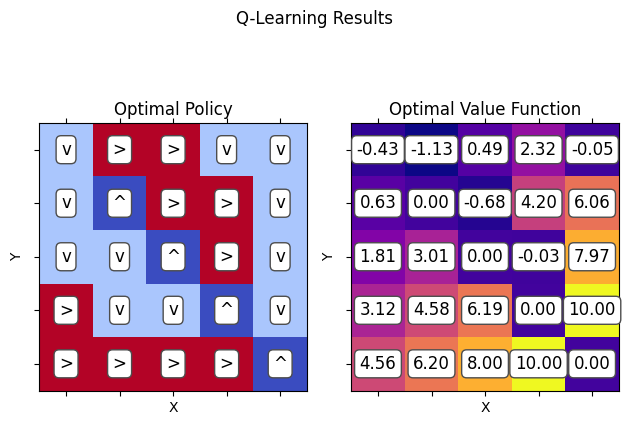

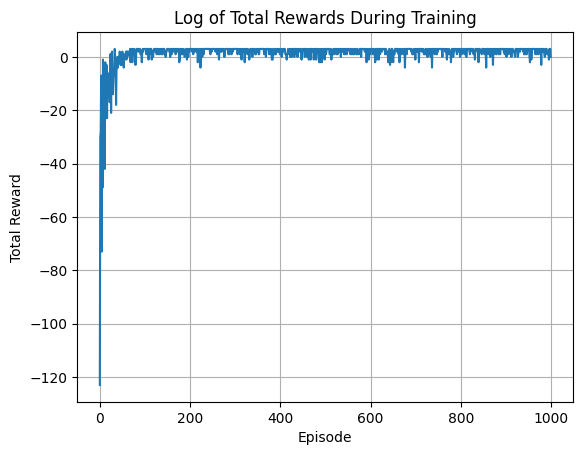

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

class GridEnvironment:
    def __init__(self, width=5, height=5, start=(0, 0), goal=(4, 4), obstacles=None, step_reward=-1.0, goal_reward=10.0, obstacle_penalty=-10.0):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.step_reward = step_reward
        self.goal_reward = goal_reward
        self.obstacle_penalty = obstacle_penalty

        # Initialize grid with empty cells
        self.grid = np.zeros((height, width))
        
        # Place goal
        self.grid[goal] = 2

        # Place obstacles
        self.obstacles = obstacles if obstacles is not None else []
        for obs in self.obstacles:
            self.grid[obs] = 1

        self.actions = {
            0: "up",    # Up
            1: "down",  # Down
            2: "left",  # Left
            3: "right"  # Right
        }
        
        self.action_effects = {
            "up": (-1, 0),
            "down": (1, 0),
            "left": (0, -1),
            "right": (0, 1)
        }

    def is_valid_state(self, state):
        x, y = state
        return 0 <= x < self.height and 0 <= y < self.width and self.grid[x, y] != 1

    def get_next_state(self, state, action):
        x, y = state
        dx, dy = self.action_effects[action]
        next_state = (x + dx, y + dy)
        if self.is_valid_state(next_state):
            return next_state
        return state

    def get_reward(self, state, next_state):
        if next_state == self.goal:
            return self.goal_reward
        elif self.grid[next_state] == 1:
            return self.obstacle_penalty
        else:
            return self.step_reward

def q_learning(env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    Q = np.zeros((env.height, env.width, len(env.actions)))
    log = []

    for episode in range(episodes):
        state = env.start
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.choice(list(env.actions.keys()))
            else:
                action = np.argmax(Q[state[0], state[1]])

            next_state = env.get_next_state(state, env.actions[action])
            reward = env.get_reward(state, next_state)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            td_target = reward + gamma * Q[next_state[0], next_state[1], best_next_action]
            td_error = td_target - Q[state[0], state[1], action]
            Q[state[0], state[1], action] += alpha * td_error

            if next_state == env.goal:
                done = True
            state = next_state

        log.append(total_reward)

    policy = np.argmax(Q, axis=2)
    V = np.max(Q, axis=2)
    return Q, policy, V, log

def main():
    width, height = 5, 5
    start = (0, 0)
    goal = (4, 4)
    obstacles = [(1, 1), (2, 2), (3, 3)]
    env = GridEnvironment(width, height, start, goal, obstacles)

    alpha = 0.1
    gamma = 0.9
    epsilon = 0.1
    episodes = 1000

    Q, policy, V, log = q_learning(env, alpha, gamma, epsilon, episodes)

    print("\nThe Returned Q-Value Function (Q):")
    print(Q)

    print("\nThe Returned Policy (0: Up, 1: Down, 2: Left, 3: Right):")
    print(policy)

    print("\nThe Returned Value Function (V):")
    print(V)

    print("\nLog of Total Rewards During Training:")
    print(log)

    arrows = {
        0: "^",  # Up
        1: "v",  # Down
        2: "<",  # Left
        3: ">"   # Right
    }

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle("Q-Learning Results")

    ax1.set_title("Optimal Policy")
    ax1.matshow(policy, cmap="coolwarm")
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            action = policy[i, j]
            ax1.text(j, i, arrows[action], ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax1.set_xticks(range(policy.shape[1]))
    ax1.set_yticks(range(policy.shape[0]))
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    ax2.set_title("Optimal Value Function")
    ax2.matshow(V, cmap="plasma")
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            value = V[i, j]
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax2.set_xticks(range(V.shape[1]))
    ax2.set_yticks(range(V.shape[0]))
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    plt.tight_layout()
    plt.show()

    iterations = range(len(log))
    plt.plot(iterations, log)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Log of Total Rewards During Training")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

### 3.1. Q-Learning Implementation on a FrozenLake-v1 of OpenAI Gym Envirognment 

C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Optimal Q-Value Function:
[[9.28863858e-01 9.50990050e-01 8.02336038e-01 9.09175496e-01]
 [9.07544486e-01 0.00000000e+00 6.45808267e-03 3.89282390e-02]
 [5.50223970e-02 0.00000000e+00 0.00000000e+00 3.31472626e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.34689052e-01 9.60596010e-01 0.00000000e+00 9.32155069e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.37161166e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.46043071e-01 0.00000000e+00 9.70299000e-01 9.16582209e-01]
 [9.09940981e-01 9.80100000e-01 9.31783192e-01 0.00000000e+00]
 [2.73972982e-01 9.88774735e-01 0.00000000e+00 4.84146673e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.61754425e-01 9.90000000e-01 9.35106362e-01]
 [8.61215685e-01 9.56065354e-01 1.00000000e+00 9.12543280e-01]
 [0.00000000e+00 0.00000000e+

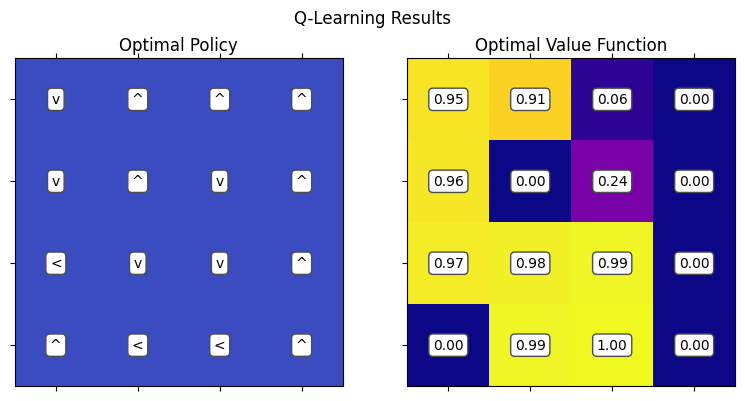

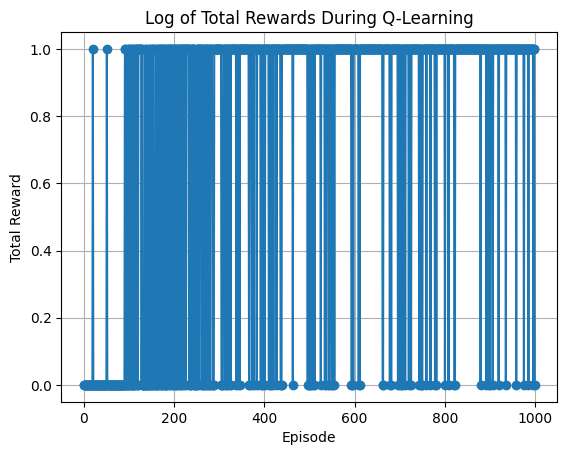


Rendering policy in the environment:


C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


Goal state reached!


In [27]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import time

def q_learning(env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.1, episodes=1000):
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    log = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += alpha * td_error

            state = next_state

        log.append(total_reward)

    policy = np.argmax(Q, axis=1)
    V = np.max(Q, axis=1)
    return Q, policy, V, log

def print_policy(policy, shape):
    actions = ['<', 'v', '>', '^']
    policy_grid = np.array([actions[action] for action in policy]).reshape(shape)
    print("\nOptimal Policy:")
    print(policy_grid)

def visualize_results(V, policy, shape, log):
    actions = ['^', 'v', '<', '>']
    policy_grid = np.array([actions[action] for action in policy]).reshape(shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle("Q-Learning Results")

    # Plot optimal policy
    ax1.set_title("Optimal Policy")
    ax1.matshow(np.zeros(shape), cmap="coolwarm")
    for i in range(shape[0]):
        for j in range(shape[1]):
            action = policy_grid[i, j]
            ax1.text(j, i, action, ha="center", va="center", fontsize=10,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax1.set_xticks(range(shape[1]))
    ax1.set_yticks(range(shape[0]))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    # Plot optimal value function
    ax2.set_title("Optimal Value Function")
    ax2.matshow(V.reshape(shape), cmap="plasma")
    for i in range(shape[0]):
        for j in range(shape[1]):
            value = V[i * shape[1] + j]
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=10,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax2.set_xticks(range(shape[1]))
    ax2.set_yticks(range(shape[0]))
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    plt.tight_layout()
    plt.show()

    # Plot log of total rewards
    episodes = range(len(log))
    plt.plot(episodes, log, marker='o')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Log of Total Rewards During Q-Learning")
    plt.grid(True)
    plt.show()

def render_policy(env, policy):
    state, _ = env.reset()
    env.render()
    time.sleep(1)  # Pause to display initial state
    done = False
    while not done:
        action = policy[state]
        state, reward, done, truncated, _ = env.step(action)
        env.render()
        time.sleep(1)  # Pause to observe each step
        if done or truncated:
            print("Goal state reached!")
            break

def main():
    env = gym.make('FrozenLake-v1', is_slippery=False)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1.0
    epsilon_decay = 0.995
    min_epsilon = 0.1
    episodes = 1000

    Q, policy, V, log = q_learning(env, alpha, gamma, epsilon, epsilon_decay, min_epsilon, episodes)

    print("Optimal Q-Value Function:")
    print(Q)

    print("Optimal Value Function:")
    print(V.reshape((4, 4)))

    print_policy(policy, (4, 4))

    visualize_results(V, policy, (4, 4), log)

    print("\nRendering policy in the environment:")
    render_policy(env, policy)

if __name__ == "__main__":
    main()


### 3.3. Q-Learning Implementation on a Single-State Multi-Armed Bandit Envirognment  

Estimated Q-values for each arm:
[0.16666667 0.23529412 0.13636364 0.82503365 0.67647059 0.
 0.34782609 0.59090909 0.03571429 0.        ]


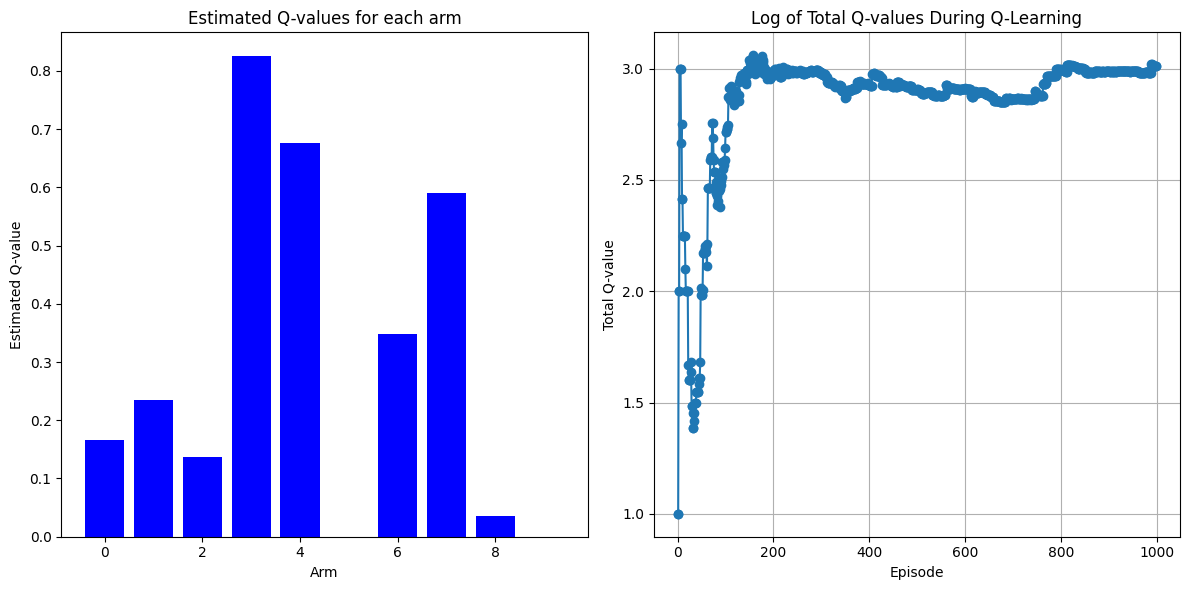

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBanditEnv:
    def __init__(self, n_arms, reward_probs):
        self.n_arms = n_arms
        self.reward_probs = reward_probs

    def step(self, action):
        reward = np.random.binomial(1, self.reward_probs[action])
        return reward

    def reset(self):
        pass

def q_learning_bandit(env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.1, episodes=1000):
    n_actions = env.n_arms
    Q = np.zeros(n_actions)
    action_counts = np.zeros(n_actions)
    log = []

    for episode in range(episodes):
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q)

        reward = env.step(action)
        action_counts[action] += 1
        alpha = 1.0 / action_counts[action]

        Q[action] = Q[action] + alpha * (reward - Q[action])
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        log.append(np.sum(Q))

    return Q, log

def plot_results(Q, log):
    plt.figure(figsize=(12, 6))

    # Plot Q-values
    plt.subplot(1, 2, 1)
    plt.bar(range(len(Q)), Q, color='blue')
    plt.xlabel("Arm")
    plt.ylabel("Estimated Q-value")
    plt.title("Estimated Q-values for each arm")

    # Plot log of total rewards
    plt.subplot(1, 2, 2)
    episodes = range(len(log))
    plt.plot(episodes, log, marker='o')
    plt.xlabel("Episode")
    plt.ylabel("Total Q-value")
    plt.title("Log of Total Q-values During Q-Learning")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    n_arms = 10
    reward_probs = np.random.rand(n_arms)  # Random reward probabilities for each arm
    env = MultiArmedBanditEnv(n_arms, reward_probs)

    alpha = 0.1
    gamma = 0.99
    epsilon = 1.0
    epsilon_decay = 0.995
    min_epsilon = 0.1
    episodes = 1000

    Q, log = q_learning_bandit(env, alpha, gamma, epsilon, epsilon_decay, min_epsilon, episodes)

    print("Estimated Q-values for each arm:")
    print(Q)

    plot_results(Q, log)

if __name__ == "__main__":
    main()


# 4. Epsilon-Greedy Policy Implementation
### 4.1.  Epsilon-Greedy Policy Implementation on a Grid World Envirognment 


Optimal Q-Value Function:
[[[ 1.21184433e-01 -3.31795232e-01  6.41116059e-02  2.52718827e-01]
  [ 2.09176757e-01 -9.52898713e-01  1.13752750e-01  3.56281643e-01]
  [ 3.29668672e-01  3.24291159e-01  2.02520389e-01  4.60890549e-01]
  [ 3.78611729e-01  5.66556110e-01  2.81805516e-01  4.58149387e-01]
  [ 7.63799458e-02  6.67919864e-01  1.50911842e-02 -3.50285103e-02]]

 [[-8.76932150e-02 -2.57462654e-01 -3.03909920e-01 -3.43900000e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-9.30015229e-04 -3.43900000e-01 -3.43900000e-01  5.52985302e-01]
  [ 4.35538553e-01  5.31379523e-01  3.08089509e-01  6.73289000e-01]
  [ 4.47253666e-01  7.81100000e-01  4.80030744e-01  5.84163387e-01]]

 [[-2.18020331e-01 -8.47596069e-02 -2.17338026e-01 -2.12520203e-01]
  [-1.90000000e-01 -1.32641419e-01 -1.62976959e-01 -2.71000000e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-4.70283932e-02 -2.71000000e-01 -4.09510000e-01  7.63366579e-01]
  [ 6.11237754e-01

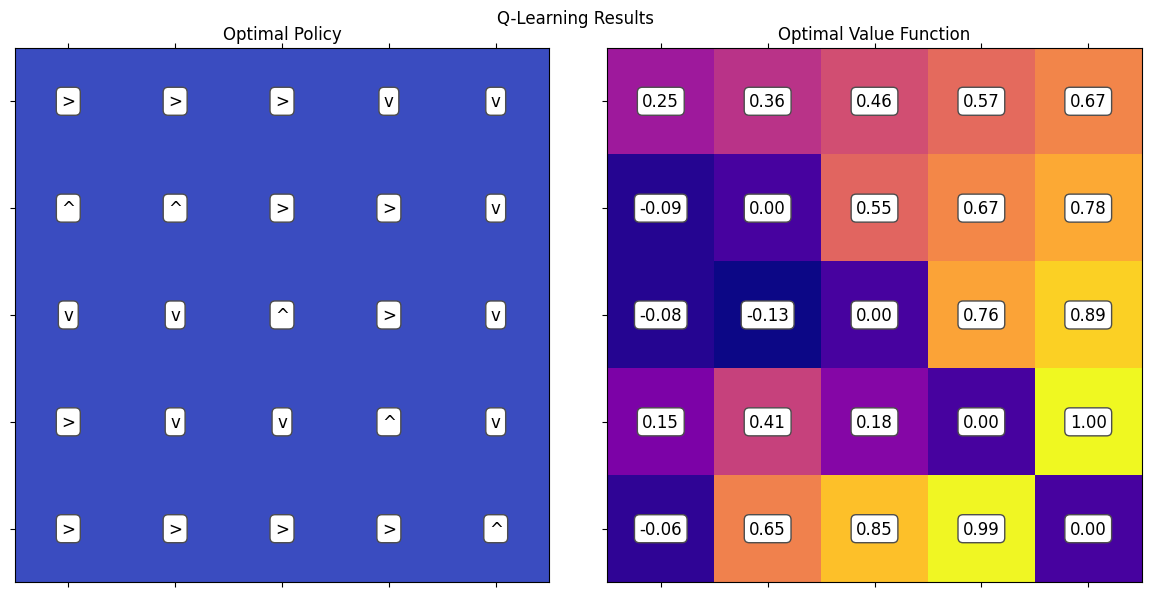

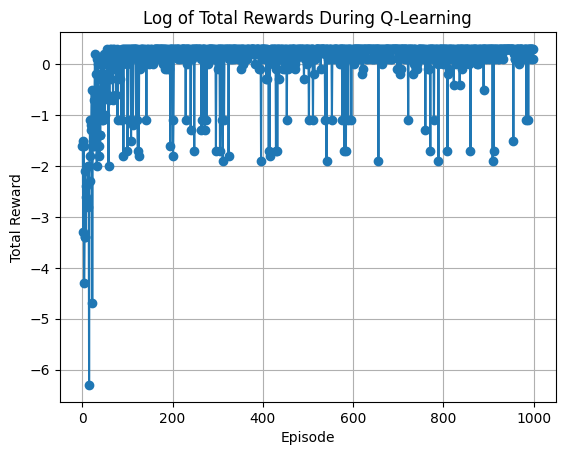

Rendering learned policy in the environment:
[[ 2.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  2.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  0.  2.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  0.  0.  2.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  2.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  2.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  2.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  2.]
 [ 0.  0.  0.  0.  3.]]
[[ 0.  0.  0.  0.  0.]
 [ 0

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import time

class GridWorldEnv:
    def __init__(self, grid, start, goal, obstacles, reward_goal=1, reward_obstacle=-1, reward_default=-0.1):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reward_goal = reward_goal
        self.reward_obstacle = reward_obstacle
        self.reward_default = reward_default
        self.n_actions = 4  # Up, Down, Left, Right
        self.state = start
        self.done = False

    def reset(self):
        self.state = self.start
        self.done = False
        return self.state

    def step(self, action):
        if self.done:
            return self.state, 0, self.done, {}

        x, y = self.state

        if action == 0:  # Up
            x -= 1
        elif action == 1:  # Down
            x += 1
        elif action == 2:  # Left
            y -= 1
        elif action == 3:  # Right
            y += 1

        if x < 0 or x >= self.grid.shape[0] or y < 0 or y >= self.grid.shape[1]:
            x, y = self.state  # Boundary conditions

        new_state = (x, y)

        if new_state == self.goal:
            reward = self.reward_goal
            self.done = True
        elif new_state in self.obstacles:
            reward = self.reward_obstacle
            self.done = True
        else:
            reward = self.reward_default

        self.state = new_state
        return new_state, reward, self.done, {}

    def render(self):
        env_grid = np.copy(self.grid)
        x, y = self.state
        env_grid[x, y] = 2  # Mark the current state
        for obs in self.obstacles:
            env_grid[obs] = -1  # Mark obstacles
        env_grid[self.goal] = 3  # Mark goal

        print(env_grid)

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(len(Q[state]))
    else:
        return np.argmax(Q[state])

def q_learning(env, alpha=0.1, gamma=0.99, epsilon=0.1, episodes=1000):
    n_actions = env.n_actions
    Q = np.zeros((env.grid.shape[0], env.grid.shape[1], n_actions))
    log = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            x, y = state
            action = epsilon_greedy_policy(Q, (x, y), epsilon)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            next_x, next_y = next_state

            best_next_action = np.argmax(Q[next_x, next_y])
            td_target = reward + gamma * Q[next_x, next_y, best_next_action]
            td_error = td_target - Q[x, y, action]
            Q[x, y, action] += alpha * td_error

            state = next_state

        log.append(total_reward)

    policy = np.argmax(Q, axis=2)
    V = np.max(Q, axis=2)
    return Q, policy, V, log

def plot_results(policy, V, log, grid_shape):
    arrows = {
        0: "^",  # Up
        1: "v",  # Down
        2: "<",  # Left
        3: ">"   # Right
    }

    policy_grid = np.array([[arrows[action] for action in row] for row in policy])
    V_grid = V

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle("Q-Learning Results")

    # Plot optimal policy
    ax1.set_title("Optimal Policy")
    ax1.matshow(np.zeros(grid_shape), cmap="coolwarm")
    for i in range(policy_grid.shape[0]):
        for j in range(policy_grid.shape[1]):
            action = policy_grid[i, j]
            ax1.text(j, i, action, ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax1.set_xticks(range(policy_grid.shape[1]))
    ax1.set_yticks(range(policy_grid.shape[0]))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    # Plot optimal value function
    ax2.set_title("Optimal Value Function")
    ax2.matshow(V_grid, cmap="plasma")
    for i in range(V_grid.shape[0]):
        for j in range(V_grid.shape[1]):
            value = V_grid[i, j]
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax2.set_xticks(range(V_grid.shape[1]))
    ax2.set_yticks(range(V_grid.shape[0]))
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    plt.tight_layout()
    plt.show()

    # Plot log of total rewards
    episodes = range(len(log))
    plt.plot(episodes, log, marker='o')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Log of Total Rewards During Q-Learning")
    plt.grid(True)
    plt.show()

def render_policy(env, policy):
    state = env.reset()
    env.render()
    done = False
    while not done:
        x, y = state
        action = policy[x, y]
        state, _, done, _ = env.step(action)
        env.render()
        time.sleep(1)  # Pause to observe each step
        if done:
            print("Goal state reached!")
            break

def main():
    grid = np.zeros((5, 5))
    start = (0, 0)
    goal = (4, 4)
    obstacles = [(1, 1), (2, 2), (3, 3)]

    env = GridWorldEnv(grid, start, goal, obstacles)

    alpha = 0.1
    gamma = 0.99
    epsilon = 0.1
    episodes = 1000

    Q, policy, V, log = q_learning(env, alpha, gamma, epsilon, episodes)

    print("Optimal Q-Value Function:")
    print(Q)

    print("Optimal Value Function:")
    print(V)

    plot_results(policy, V, log, grid.shape)

    print("Rendering learned policy in the environment:")
    render_policy(env, policy)

if __name__ == "__main__":
    main()


### 4.2.  Epsilon-Greedy Policy Implementation on a Single-State Multi-Armed Bandit Envirognment 

Optimal Q-Values:
[ 0.7941401  -0.49250026  0.17827775 -0.42269858 -0.52349878  1.92952361
  0.41596714  0.24676605 -0.74076666  0.41551583]


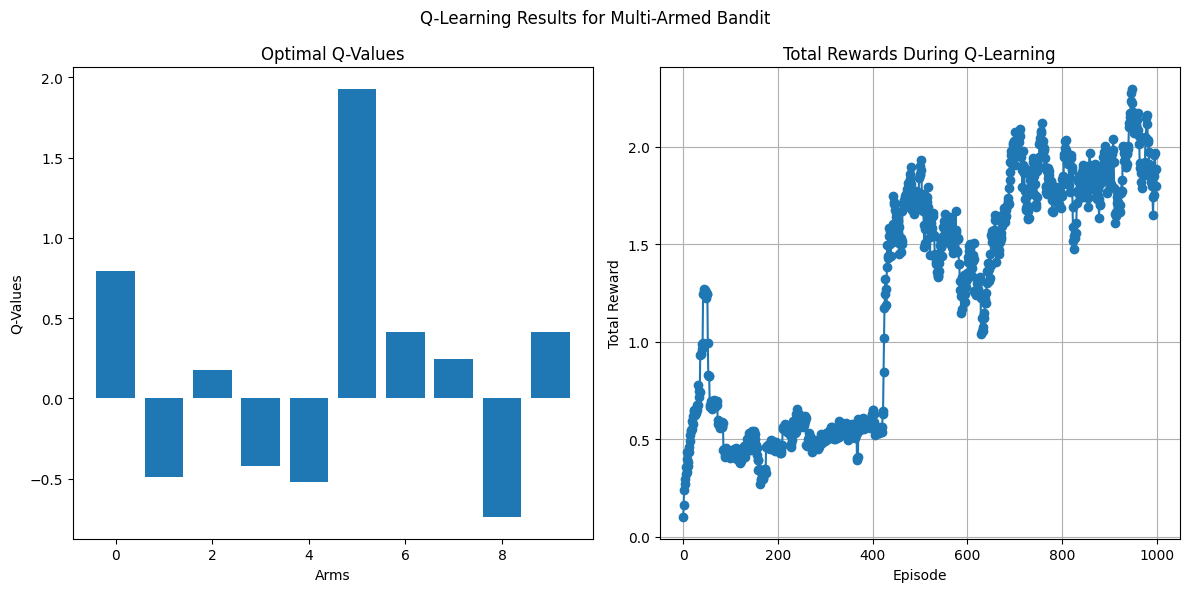

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBanditEnv:
    def __init__(self, k_arms, reward_distributions):
        self.k_arms = k_arms
        self.reward_distributions = reward_distributions

    def step(self, action):
        return np.random.normal(self.reward_distributions[action][0], self.reward_distributions[action][1])

def epsilon_greedy_policy(Q, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(len(Q))
    else:
        return np.argmax(Q)

def q_learning_bandit(env, alpha=0.1, epsilon=0.1, episodes=1000):
    Q = np.zeros(env.k_arms)
    action_counts = np.zeros(env.k_arms)
    log = []

    for episode in range(episodes):
        action = epsilon_greedy_policy(Q, epsilon)
        reward = env.step(action)
        action_counts[action] += 1
        Q[action] += alpha * (reward - Q[action])
        log.append(np.sum(Q))

    return Q, log

def plot_results(Q, log, k_arms):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle("Q-Learning Results for Multi-Armed Bandit")

    # Plot Q-values
    ax1.set_title("Optimal Q-Values")
    ax1.bar(range(k_arms), Q)
    ax1.set_xlabel("Arms")
    ax1.set_ylabel("Q-Values")

    # Plot total rewards
    episodes = range(len(log))
    ax2.set_title("Total Rewards During Q-Learning")
    ax2.plot(episodes, log, marker='o')
    ax2.set_xlabel("Episode")
    ax2.set_ylabel("Total Reward")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    k_arms = 10
    reward_distributions = [(np.random.normal(), np.random.uniform(0.1, 1.0)) for _ in range(k_arms)]
    env = MultiArmedBanditEnv(k_arms, reward_distributions)

    alpha = 0.1
    epsilon = 0.1
    episodes = 1000

    Q, log = q_learning_bandit(env, alpha, epsilon, episodes)

    print("Optimal Q-Values:")
    print(Q)

    plot_results(Q, log, k_arms)

if __name__ == "__main__":
    main()


### 4.3. Epsilon-Greedy Policy Implimentation on a Froen lake Envirognment 

C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0/1000 - Total Reward: 0.0
Episode 100/1000 - Total Reward: 0.0
Episode 200/1000 - Total Reward: 0.0
Episode 300/1000 - Total Reward: 0.0
Episode 400/1000 - Total Reward: 0.0
Episode 500/1000 - Total Reward: 0.0
Episode 600/1000 - Total Reward: 0.0
Episode 700/1000 - Total Reward: 0.0
Episode 800/1000 - Total Reward: 0.0
Episode 900/1000 - Total Reward: 0.0
Optimal Q-Value Function:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Optimal Value Function:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


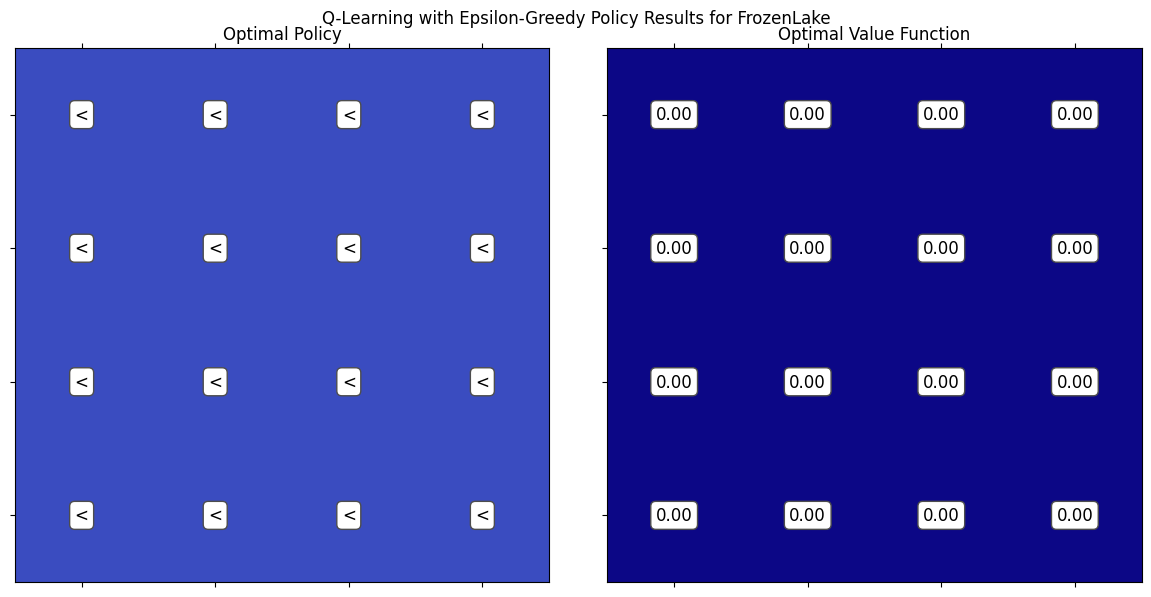

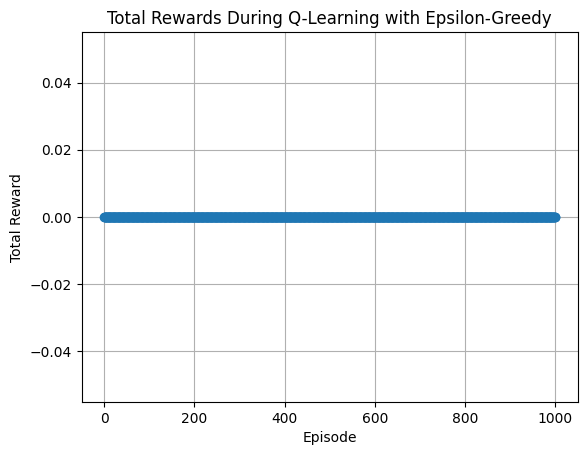

Rendering policy in the environment:


C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


In [40]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import time

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q[state]))
    else:
        return np.argmax(Q[state])

def q_learning_epsilon_greedy(env, alpha=0.1, gamma=0.99, epsilon=0.1, episodes=1000):
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    log = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += alpha * td_error

            state = next_state

        log.append(total_reward)
        if episode % 100 == 0:
            print(f"Episode {episode}/{episodes} - Total Reward: {total_reward}")

    policy = np.argmax(Q, axis=1)
    V = np.max(Q, axis=1)
    return Q, policy, V, log

def plot_results(policy, V, log, grid_shape):
    actions = ['<', 'v', '>', '^']
    policy_grid = np.array([actions[action] for action in policy]).reshape(grid_shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle("Q-Learning with Epsilon-Greedy Policy Results for FrozenLake")

    ax1.set_title("Optimal Policy")
    ax1.matshow(np.zeros(grid_shape), cmap="coolwarm")
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            action = policy_grid[i, j]
            ax1.text(j, i, action, ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax1.set_xticks(range(grid_shape[1]))
    ax1.set_yticks(range(grid_shape[0]))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    ax2.set_title("Optimal Value Function")
    ax2.matshow(V.reshape(grid_shape), cmap="plasma")
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            value = V[i * grid_shape[1] + j]
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax2.set_xticks(range(grid_shape[1]))
    ax2.set_yticks(range(grid_shape[0]))
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    plt.tight_layout()
    plt.show()

    episodes = range(len(log))
    plt.plot(episodes, log, marker='o')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Rewards During Q-Learning with Epsilon-Greedy")
    plt.grid(True)
    plt.show()

def render_policy(env, policy):
    state, _ = env.reset()
    env.render()
    time.sleep(1)  # Pause to display initial state
    for _ in range(20):
        action = policy[state]
        state, reward, done, _, _ = env.step(action)
        env.render()
        time.sleep(1)  # Pause to observe each step
        if done:
            print("Goal state reached!")
            break

def main_epsilon_greedy():
    env = gym.make('FrozenLake-v1', is_slippery=False)
    alpha = 0.1
    gamma = 0.99
    epsilon = 0.1
    episodes = 1000

    Q, policy, V, log = q_learning_epsilon_greedy(env, alpha, gamma, epsilon, episodes)

    print("Optimal Q-Value Function:")
    print(Q)

    print("Optimal Value Function:")
    print(V)

    plot_results(policy, V, log, (4, 4))

    print("Rendering policy in the environment:")
    render_policy(env, policy)

if __name__ == "__main__":
    main_epsilon_greedy()


# 5. Upper Confidence Bound (UCB) Algorithm Implimentation
### 5.1 Upper Confidence Bound (UCB) Algorithm Implimentation on Grid Worled Envirognment

C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Optimal Q-Value Function:
[[0.01314812 0.00976191 0.95099005 0.01314812]
 [0.01226743 0.         0.96059601 0.01697226]
 [0.01369804 0.970299   0.00452517 0.02029043]
 [0.01177415 0.         0.00286416 0.00286416]
 [0.00771003 0.01201495 0.         0.00947965]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.01166817]
 [0.         0.         0.         0.        ]
 [0.00763068 0.         0.01932014 0.00485004]
 [0.00452811 0.02269166 0.21882147 0.        ]
 [0.02287592 0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.01482009 0.50627076 0.00633519]
 [0.14714085 0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]
Optimal Value Function:
[0.95099005 0.96059601 0.970299   0.01177415 0.01201495 0.
 0.9801     0.         0.01932014 0.21882147 0.99       0.
 0.         0.50627076 1.         0.        ]


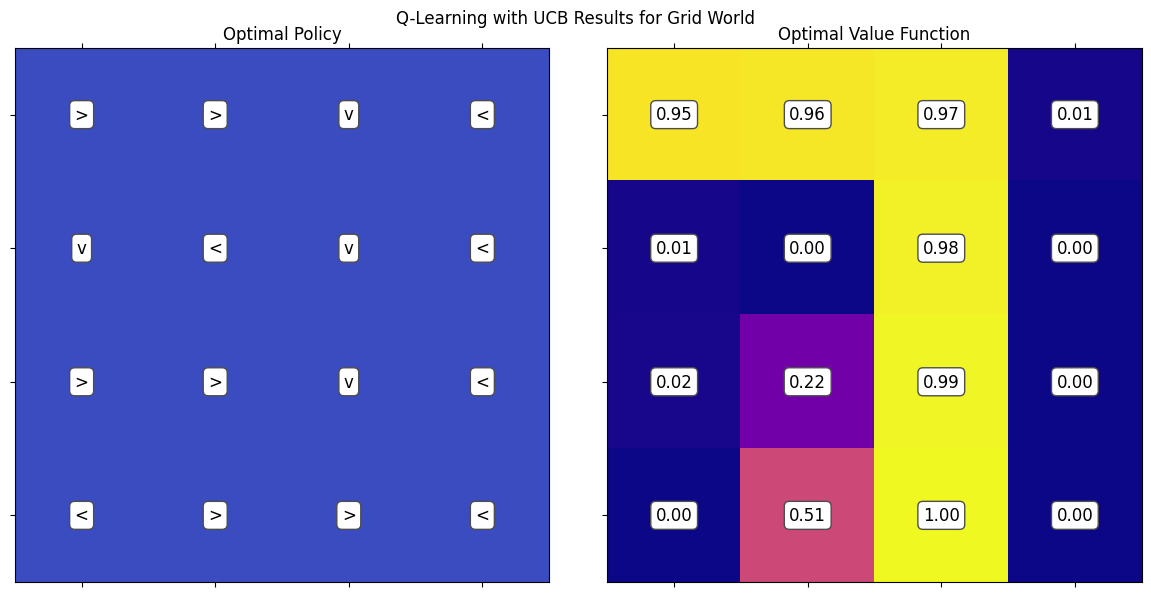

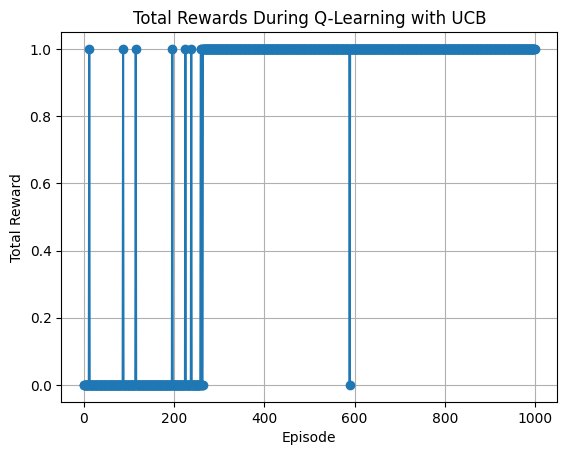

In [35]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import time

def ucb_policy(Q, state, action_counts, total_counts, c=1.0):
    if total_counts == 0:
        return np.random.choice(len(Q[state]))

    ucb_values = Q[state] + c * np.sqrt(np.log(total_counts) / (action_counts[state] + 1e-5))
    return np.argmax(ucb_values)

def q_learning_ucb(env, alpha=0.1, gamma=0.99, episodes=1000, c=1.0):
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    action_counts = np.zeros((n_states, n_actions))
    total_counts = 0
    log = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = ucb_policy(Q, state, action_counts, total_counts, c)
            action_counts[state, action] += 1
            total_counts += 1

            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += alpha * td_error

            state = next_state

        log.append(total_reward)

    policy = np.argmax(Q, axis=1)
    V = np.max(Q, axis=1)
    return Q, policy, V, log

def plot_results(policy, V, log, grid_shape):
    actions = ['<', 'v', '>', '^']
    policy_grid = np.array([actions[action] for action in policy]).reshape(grid_shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle("Q-Learning with UCB Results for Grid World")

    ax1.set_title("Optimal Policy")
    ax1.matshow(np.zeros(grid_shape), cmap="coolwarm")
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            action = policy_grid[i, j]
            ax1.text(j, i, action, ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax1.set_xticks(range(grid_shape[1]))
    ax1.set_yticks(range(grid_shape[0]))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    ax2.set_title("Optimal Value Function")
    ax2.matshow(V.reshape(grid_shape), cmap="plasma")
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            value = V[i * grid_shape[1] + j]
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=12,
                     bbox=dict(boxstyle="round", facecolor='white', edgecolor='0.3'))
    ax2.set_xticks(range(grid_shape[1]))
    ax2.set_yticks(range(grid_shape[0]))
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    plt.tight_layout()
    plt.show()

    episodes = range(len(log))
    plt.plot(episodes, log, marker='o')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Rewards During Q-Learning with UCB")
    plt.grid(True)
    plt.show()

def main_ucb():
    env = gym.make('FrozenLake-v1', is_slippery=False)
    alpha = 0.1
    gamma = 0.99
    episodes = 1000
    c = 1.0

    Q, policy, V, log = q_learning_ucb(env, alpha, gamma, episodes, c)

    print("Optimal Q-Value Function:")
    print(Q)

    print("Optimal Value Function:")
    print(V)

    plot_results(policy, V, log, (4, 4))

if __name__ == "__main__":
    main_ucb()


### 5.2 Upper Confidence Bound (UCB) Algorithm Implimentation on Frozen Lake Envirognment

C:\Users\pc\.conda\envs\RL_assignment\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Optimal Q-Value Function:
[[7.05685270e-03 4.60850634e-03 9.50990050e-01 7.05685271e-03]
 [5.33973404e-03 0.00000000e+00 9.60596010e-01 7.30134951e-03]
 [5.54653605e-03 9.70299000e-01 1.53213548e-03 1.11118215e-02]
 [5.55998971e-03 0.00000000e+00 9.17204979e-04 9.17204979e-04]
 [3.43241552e-03 5.91963929e-03 0.00000000e+00 4.77537999e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.80100000e-01 0.00000000e+00 5.20755227e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.00210031e-03 0.00000000e+00 1.23055904e-02 1.80851959e-03]
 [2.06075153e-03 1.76994985e-02 1.25030122e-01 0.00000000e+00]
 [6.85607099e-03 9.90000000e-01 0.00000000e+00 9.70299000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.31026790e-03 4.64146317e-01 2.17297394e-03]
 [1.16112113e-01 9.90000000e-01 1.00000000e+00 9.80100000e-01]
 [0.00000000e+00 0.00000000e+

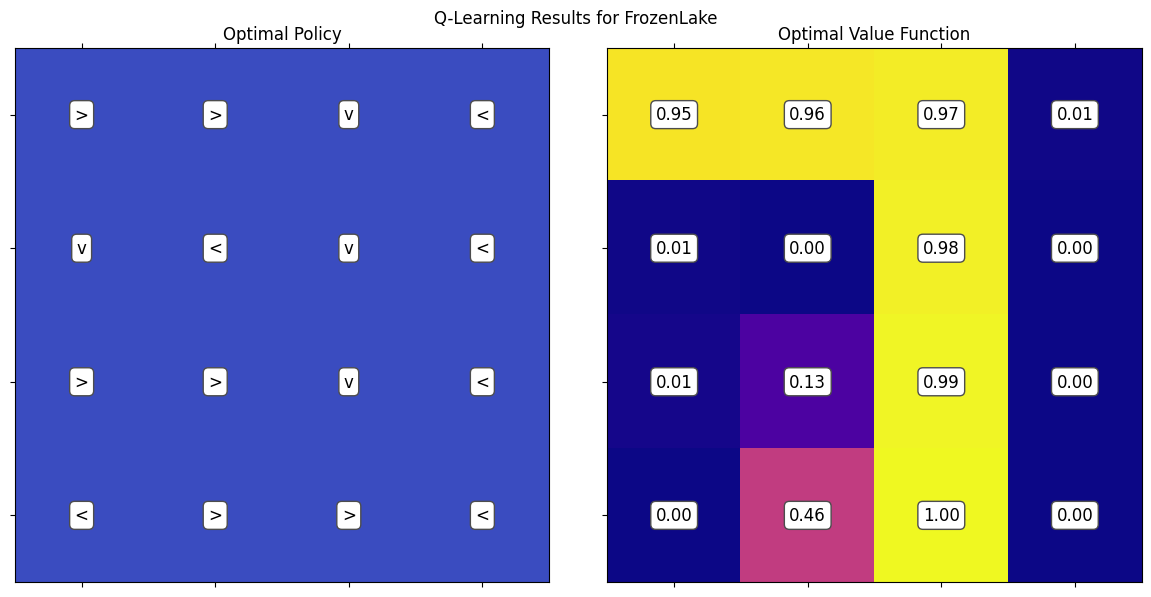

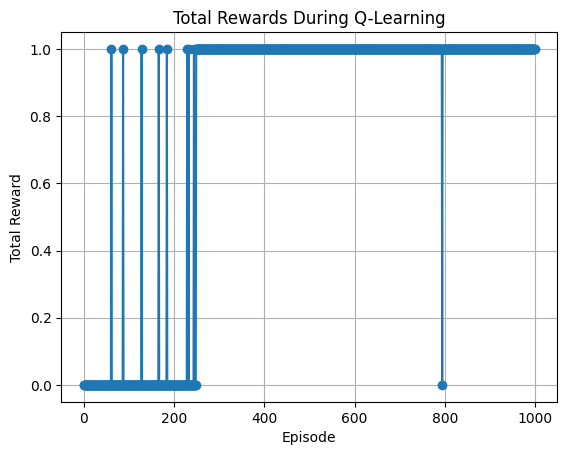

In [33]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import time

def ucb_policy(Q, state, action_counts, c=1.0):
    total_counts = np.sum(action_counts[state])
    if total_counts == 0:
        return np.random.choice(len(Q[state]))
    
    ucb_values = Q[state] + c * np.sqrt(np.log(total_counts) / (action_counts[state] + 1e-5))
    return np.argmax(ucb_values)

def q_learning_ucb(env, alpha=0.1, gamma=0.99, episodes=1000, c=1.0):
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    action_counts = np.zeros((n_states, n_actions))
    log = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = ucb_policy(Q, state, action_counts, c)
            action_counts[state, action] += 1
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += alpha * td_error

            state = next_state

        log.append(total_reward)

    policy = np.argmax(Q, axis=1)
    V = np.max(Q, axis=1)
    return Q, policy, V, log

def main_ucb():
    env = gym.make('FrozenLake-v1', is_slippery=False)
    alpha = 0.1
    gamma = 0.99
    episodes = 1000
    c = 1.0

    Q, policy, V, log = q_learning_ucb(env, alpha, gamma, episodes, c)

    print("Optimal Q-Value Function:")
    print(Q)

    print("Optimal Value Function:")
    print(V)

    plot_results(policy, V, log, (4, 4))

if __name__ == "__main__":
    main_ucb()


### 5.3 Upper Confidence Bound (UCB) Algorithm Implimentation on Single-State Multi-Armed Bandit

Optimal Q-Values:
[ 0.24670691  0.0498304   0.05225533  0.08910476  0.0286027   2.64614594
 -0.04022474 -0.30989752 -0.10172557  0.88101547]


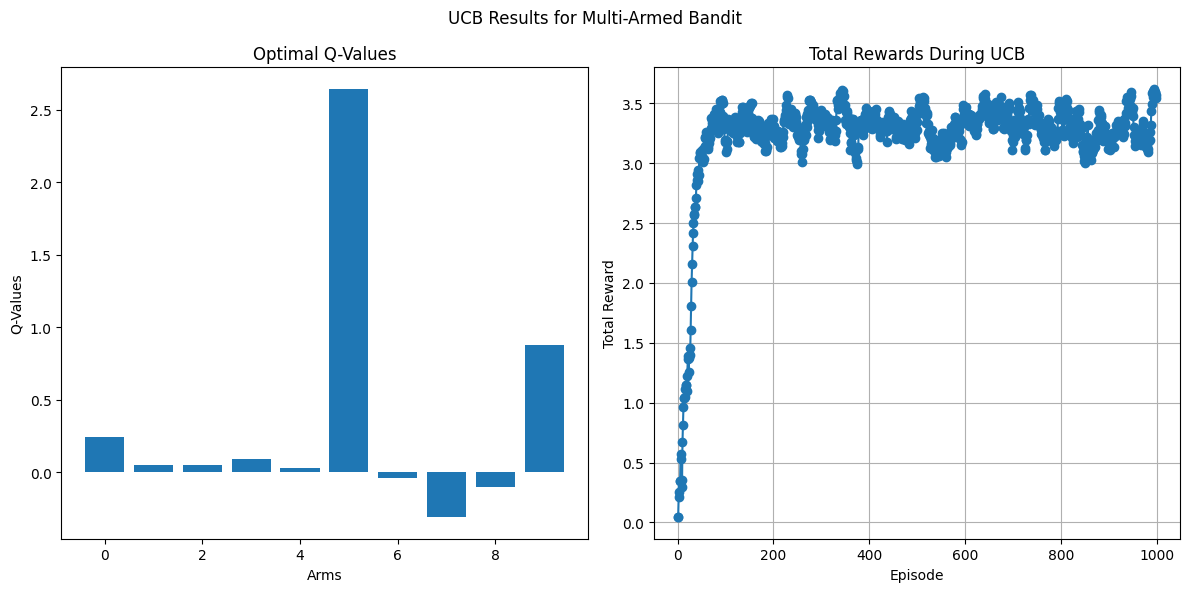

In [34]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBanditEnv:
    def __init__(self, k_arms, reward_distributions):
        self.k_arms = k_arms
        self.reward_distributions = reward_distributions

    def step(self, action):
        return np.random.normal(self.reward_distributions[action][0], self.reward_distributions[action][1])

def ucb_policy(Q, action_counts, c=1.0):
    total_counts = np.sum(action_counts)
    if total_counts == 0:
        return np.random.choice(len(Q))
    
    ucb_values = Q + c * np.sqrt(np.log(total_counts) / (action_counts + 1e-5))
    return np.argmax(ucb_values)

def q_learning_bandit_ucb(env, alpha=0.1, episodes=1000, c=1.0):
    Q = np.zeros(env.k_arms)
    action_counts = np.zeros(env.k_arms)
    log = []

    for episode in range(episodes):
        action = ucb_policy(Q, action_counts, c)
        action_counts[action] += 1
        reward = env.step(action)
        Q[action] += alpha * (reward - Q[action])
        log.append(np.sum(Q))

    return Q, log

def plot_results(Q, log, k_arms):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle("UCB Results for Multi-Armed Bandit")

    ax1.set_title("Optimal Q-Values")
    ax1.bar(range(k_arms), Q)
    ax1.set_xlabel("Arms")
    ax1.set_ylabel("Q-Values")

    episodes = range(len(log))
    ax2.set_title("Total Rewards During UCB")
    ax2.plot(episodes, log, marker='o')
    ax2.set_xlabel("Episode")
    ax2.set_ylabel("Total Reward")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def main_bandit_ucb():
    k_arms = 10
    reward_distributions = [(np.random.normal(), np.random.uniform(0.1, 1.0)) for _ in range(k_arms)]
    env = MultiArmedBanditEnv(k_arms, reward_distributions)

    alpha = 0.1
    episodes = 1000
    c = 1.0

    Q, log = q_learning_bandit_ucb(env, alpha, episodes, c)

    print("Optimal Q-Values:")
    print(Q)

    plot_results(Q, log, k_arms)

if __name__ == "__main__":
    main_bandit_ucb()
